In [24]:
import os
import logging
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# import tensorflow.keras as keras
# from tensorflow.keras.callbacks import ModelCheckpoint
# from tensorflow.keras.utils import plot_model

import tensorflow as tf
import keras

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split


In [ ]:
!nvidia-smi

In [2]:
# Maximale Zeilen und Spalten anzeigen
pd.set_option('display.max_rows', None)  # Zeilen
pd.set_option('display.max_columns', None)  # Spalten

# Logging Parameter
logging.basicConfig(
    filename='31_cnn.log',
    level=logging.INFO,
    format='%(asctime)s - %(levelname)s - %(message)s',
    datefmt='%Y-%m-%d %H:%M:%S'
)

# Verzeichnis der CSV-Dateien
parquet_verzeichnis_ids17 = '../01_Datensaetze/improved_cic-ids-2017/ids17_parquet'
parquet_verzeichnis_ids18 = '../01_Datensaetze/improved_cse-cic-ids-2018/ids18_parquet'

In [6]:
# Load data
#df = pd.read_csv(os.path.join(PROCESSED_DIR_PATH, 'train_MachineLearningCVE.csv'), skipinitialspace=True)
df = pd.read_parquet(os.path.join(parquet_verzeichnis_ids17 + '_prep_0'))
logging.info("Class distribution\n{}".format(df.Label.value_counts()))

In [ ]:
df.columns

Index(['Dst Port', 'Protocol', 'Flow Duration', 'Total Fwd Packet',
       'Total Bwd packets', 'Total Length of Fwd Packet',
       'Total Length of Bwd Packet', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags',
       'Fwd URG Flags', 'Bwd URG Flags', 'Fwd RST Flags', 'Bwd RST Flags',
       'Fwd Header Length', 'Bwd Header Length', 'Fwd Packets/s',
       'Bwd Packets/s', 'Packet Length Min', 'Packet Length Max',
       'Packet Length Mean', 'Packet Length Std', 'Packet Length Variance',
       

In [29]:
df.shape

(1923167, 84)

 Trennen von Features und Labels

In [17]:
# Letzte Spalte 'Label' ist die Zielvariable

X = df.iloc[:, :-1]  # Alle Spalten außer der letzten
print("Form von X:", X.shape)
y = df.iloc[:, -1]   # Die letzte Spalte
print("Form von y:", y.shape)


Form von X: (1923167, 83)
Form von y: (1923167,)


In [18]:
X.head(2)

,Dst Port,Protocol,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd RST Flags,Bwd RST Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Packet Length Min,Packet Length Max,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWR Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Fwd Segment Size Avg,Bwd Segment Size Avg,Fwd Bytes/Bulk Avg,Fwd Packet/Bulk Avg,Fwd Bulk Rate Avg,Bwd Bytes/Bulk Avg,Bwd Packet/Bulk Avg,Bwd Bulk Rate Avg,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,FWD Init Win Bytes,Bwd Init Win Bytes,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,ICMP Code,ICMP Type,Total TCP Flow Time
0,3268,6,112740690,32,16,6448.0,1152.0,403.0,0.0,201.5,204.724197,72.0,72.0,72.0,0.0,67.411331,0.425756,2398738.00,5798698.0,16399772.0,3.0,112740688.0,3636796.50,6848761.0,16399772.0,3.0,112740352.0,7516023.0,8323385.0,16400110.0,3.0,16,16,0,0,0,0,1024,512,0.283837,0.141919,0.0,403.0,158.333328,177.341751,31450.099291,0,0,0,32,48,0,0.0,0.0,0.5,158.333333,201.5,72.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,134.0,0.0,24.0,377.0,2079.0,15.0,32.0,359.428571,11.998016,380.0,343.0,1.610540e+07,498804.820328,16399772.0,15375229.0,-1.0,-1.0,112740690.0
1,389,6,112740560,32,16,6448.0,5056.0,403.0,0.0,201.5,204.724197,316.0,316.0,316.0,0.0,102.039589,0.425756,2398735.25,5798709.5,16399782.0,2.0,112740560.0,3636792.25,6848777.0,16399782.0,2.0,112740240.0,7516016.0,8323376.0,16400110.0,4.0,16,16,0,0,0,0,1024,512,0.283838,0.141919,0.0,403.0,239.666672,174.984177,30619.460993,0,0,0,32,48,0,0.0,0.0,0.5,239.666667,201.5,316.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,134.0,0.0,105.0,955.0,2079.0,15.0,32.0,320.285714,15.744992,330.0,285.0,1.610543e+07,498793.665561,16399782.0,15375263.0,-1.0,-1.0,112740560.0


In [19]:
y.head(2)

0    BENIGN
1    BENIGN
Name: Label, dtype: object

Umgang mit fehlenden Werten

In [20]:
print("Anzahl fehlender Werte in jedem Feature:")
print(X.isnull().sum())

Anzahl fehlender Werte in jedem Feature:
Dst Port                      0
Protocol                      0
Flow Duration                 0
Total Fwd Packet              0
Total Bwd packets             0
Total Length of Fwd Packet    0
Total Length of Bwd Packet    0
Fwd Packet Length Max         0
Fwd Packet Length Min         0
Fwd Packet Length Mean        0
Fwd Packet Length Std         0
Bwd Packet Length Max         0
Bwd Packet Length Min         0
Bwd Packet Length Mean        0
Bwd Packet Length Std         0
Flow Bytes/s                  0
Flow Packets/s                0
Flow IAT Mean                 0
Flow IAT Std                  0
Flow IAT Max                  0
Flow IAT Min                  0
Fwd IAT Total                 0
Fwd IAT Mean                  0
Fwd IAT Std                   0
Fwd IAT Max                   0
Fwd IAT Min                   0
Bwd IAT Total                 0
Bwd IAT Mean                  0
Bwd IAT Std                   0
Bwd IAT Max                   0

In [22]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [23]:
print("Einzigartige Labels:", label_encoder.classes_)
print("Kodierte Labels:", np.unique(y_encoded))

Einzigartige Labels: ['BENIGN' 'Botnet Ares' 'DDoS-LOIC-HTTP' 'DoS GoldenEye' 'DoS Hulk'
 'DoS Slowloris' 'Infiltration - NMAP Portscan' 'SSH-BruteForce'
 'Web Attack - Brute Force' 'Web Attack - SQL' 'Web Attack - XSS']
Kodierte Labels: [ 0  1  2  3  4  5  6  7  8  9 10]


### Skallierung

In [25]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [28]:
print("Form von X:", X.shape)
print("Form von X_scaled:", X_scaled.shape)
print("Größe von X_scaled:", X_scaled.size)

Form von X: (1923167, 83)
Form von X_scaled: (1923167, 83)
Größe von X_scaled: 159622861


### Umformen der Daten für das CNN

In [30]:
# Anzahl der Features
num_features = X_scaled.shape[1]  # Sollte 83 sein

# Umformen zu (Anzahl_Beispiele, num_features, 1)
X_reshaped = X_scaled.reshape(-1, num_features, 1)
print("Form von X_reshaped:", X_reshaped.shape)  # Erwartet: (1923167, 83, 1)



Form von X_reshaped: (1923167, 83, 1)


### Aufteilen der Daten in Trainings-, Validierungs- und Testdatensätze

In [33]:
# Aufteilen in Trainings- und temporären Datensatz
X_train, X_temp, y_train, y_temp = train_test_split(
    X_reshaped, y_encoded, test_size=0.20, random_state=42, stratify=y_encoded)

# Aufteilen des temporären Datensatzes in Validierung und Test
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.50, random_state=42, stratify=y_temp)

print("Form von X_train:", X_train.shape)
print("Form von X_val:", X_val.shape)
print("Form von X_test:", X_test.shape)

Form von X_train: (1538533, 83, 1)
Form von X_val: (192317, 83, 1)
Form von X_test: (192317, 83, 1)


### Überprüfen der Klassenverteilung

In [34]:
def print_class_distribution(y, dataset_name):
    unique, counts = np.unique(y, return_counts=True)
    total = len(y)
    print(f"Klassenverteilung in {dataset_name}:")
    for cls, count in zip(unique, counts):
        print(f"  Klasse {cls}: {count} Beispiele ({(count/total)*100:.2f}%)")
    print()

print_class_distribution(y_train, "Trainingsdatensatz")
print_class_distribution(y_val, "Validierungsdatensatz")
print_class_distribution(y_test, "Testdatensatz")

Klassenverteilung in Trainingsdatensatz:
  Klasse 0: 1266048 Beispiele (82.29%)
  Klasse 1: 589 Beispiele (0.04%)
  Klasse 2: 76115 Beispiele (4.95%)
  Klasse 3: 6054 Beispiele (0.39%)
  Klasse 4: 126774 Beispiele (8.24%)
  Klasse 5: 3087 Beispiele (0.20%)
  Klasse 6: 57414 Beispiele (3.73%)
  Klasse 7: 2369 Beispiele (0.15%)
  Klasse 8: 58 Beispiele (0.00%)
  Klasse 9: 11 Beispiele (0.00%)
  Klasse 10: 14 Beispiele (0.00%)

Klassenverteilung in Validierungsdatensatz:
  Klasse 0: 158257 Beispiele (82.29%)
  Klasse 1: 74 Beispiele (0.04%)
  Klasse 2: 9514 Beispiele (4.95%)
  Klasse 3: 756 Beispiele (0.39%)
  Klasse 4: 15847 Beispiele (8.24%)
  Klasse 5: 386 Beispiele (0.20%)
  Klasse 6: 7176 Beispiele (3.73%)
  Klasse 7: 296 Beispiele (0.15%)
  Klasse 8: 8 Beispiele (0.00%)
  Klasse 9: 1 Beispiele (0.00%)
  Klasse 10: 2 Beispiele (0.00%)

Klassenverteilung in Testdatensatz:
  Klasse 0: 158256 Beispiele (82.29%)
  Klasse 1: 73 Beispiele (0.04%)
  Klasse 2: 9515 Beispiele (4.95%)
  Klasse

 ### Modell erstellen und trainieren

In [35]:
def create_cnn_model(num_features, num_classes):
    inputs = keras.layers.Input(shape=(num_features, 1))
    x = keras.layers.Conv1D(120, kernel_size=2, activation='relu', padding="same")(inputs)
    x = keras.layers.Conv1D(60, kernel_size=3, activation='relu', padding="same")(x)
    x = keras.layers.Conv1D(30, kernel_size=4, activation='relu', padding="same")(x)
    x = keras.layers.Flatten()(x)
    outputs = keras.layers.Dense(num_classes, activation='softmax')(x)
    cnn_model = keras.Model(inputs=inputs, outputs=outputs, name='cnn')

    # Kompilieren des Modells
    cnn_model.compile(loss='sparse_categorical_crossentropy',
                      metrics=['sparse_categorical_accuracy'],
                      optimizer='adam')

    return cnn_model

# Anzahl der Klassen (Labels)
num_classes = len(label_encoder.classes_)

# Modell erstellen
cnn_model = create_cnn_model(num_features, num_classes)
cnn_model.summary()


Model: "cnn"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 83, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 83, 120)        │           360 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_4 (Conv1D)               │ (None, 83, 60)         │        21,660 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_5 (Conv1D)               │ (None, 83, 30)         │         7,230 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2490)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 11)             │        27,401 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 56,651 (221.29 KB)

 Trainable params: 56,651 (221.29 KB)

 Non-trainable params: 0 (0.00 B)

### Trainieren des Modells

In [36]:
cnn_model.fit(
    X_train, y_train,
    epochs=2,
    batch_size=32,
    validation_data=(X_val, y_val)
)

Epoch 1/10


I0000 00:00:1730207660.340637  728401 service.cc:146] XLA service 0x7ef9e0004870 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1730207660.341305  728401 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce RTX 4060, Compute Capability 8.9
2024-10-29 14:14:20.401181: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-10-29 14:14:20.637665: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8907


  122/48080 ━━━━━━━━━━━━━━━━━━━━ 59s 1ms/step - loss: 0.7195 - sparse_categorical_accuracy: 0.8721  

I0000 00:00:1730207662.558767  728401 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


48080/48080 ━━━━━━━━━━━━━━━━━━━━ 73s 1ms/step - loss: 0.0137 - sparse_categorical_accuracy: 0.9975 - val_loss: 7.0026e-04 - val_sparse_categorical_accuracy: 0.9998
Epoch 2/10
48080/48080 ━━━━━━━━━━━━━━━━━━━━ 65s 1ms/step - loss: 0.0013 - sparse_categorical_accuracy: 0.9998 - val_loss: 0.0011 - val_sparse_categorical_accuracy: 0.9998
Epoch 3/10
48080/48080 ━━━━━━━━━━━━━━━━━━━━ 66s 1ms/step - loss: 9.7057e-04 - sparse_categorical_accuracy: 0.9998 - val_loss: 0.0025 - val_sparse_categorical_accuracy: 0.9997
Epoch 4/10
48080/48080 ━━━━━━━━━━━━━━━━━━━━ 65s 1ms/step - loss: 9.5103e-04 - sparse_categorical_accuracy: 0.9998 - val_loss: 0.0016 - val_sparse_categorical_accuracy: 0.9998
Epoch 5/10
48080/48080 ━━━━━━━━━━━━━━━━━━━━ 64s 1ms/step - loss: 7.2366e-04 - sparse_categorical_accuracy: 0.9999 - val_loss: 0.0022 - val_sparse_categorical_accuracy: 0.9999
Epoch 6/10
48080/48080 ━━━━━━━━━━━━━━━━━━━━ 64s 1ms/step - loss: 8.6902e-04 - sparse_categorical_accuracy: 0.9998 - val_loss: 0.0011 - val_s

### Evaluierung des Modells auf dem Testdatensatz

In [37]:
test_loss, test_accuracy = cnn_model.evaluate(X_test, y_test)
print(f"Testverlust: {test_loss:.4f}")
print(f"Testgenauigkeit: {test_accuracy:.4f}")

6010/6010 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 5.2594e-04 - sparse_categorical_accuracy: 0.9999
Testverlust: 0.0007
Testgenauigkeit: 0.9999


### Klassifikationsbericht und eine Konfusionsmatrix

In [38]:
# Vorhersagen auf dem Testdatensatz
y_pred_prob = cnn_model.predict(X_test)
y_pred_classes = np.argmax(y_pred_prob, axis=1)

# Klassifikationsbericht
print(classification_report(y_test, y_pred_classes, target_names=label_encoder.classes_))

# Konfusionsmatrix
cm = confusion_matrix(y_test, y_pred_classes)
print("Konfusionsmatrix:")
print(cm)

6010/6010 ━━━━━━━━━━━━━━━━━━━━ 5s 748us/step
                              precision    recall  f1-score   support

                      BENIGN       1.00      1.00      1.00    158256
                 Botnet Ares       1.00      1.00      1.00        73
              DDoS-LOIC-HTTP       1.00      1.00      1.00      9515
               DoS GoldenEye       1.00      1.00      1.00       757
                    DoS Hulk       1.00      1.00      1.00     15847
               DoS Slowloris       1.00      1.00      1.00       386
Infiltration - NMAP Portscan       1.00      1.00      1.00      7177
              SSH-BruteForce       1.00      1.00      1.00       296
    Web Attack - Brute Force       1.00      1.00      1.00         7
            Web Attack - SQL       1.00      1.00      1.00         1
            Web Attack - XSS       1.00      1.00      1.00         2

                    accuracy                           1.00    192317
                   macro avg       1.00    

Visualisierung der Konfusionsmatrix

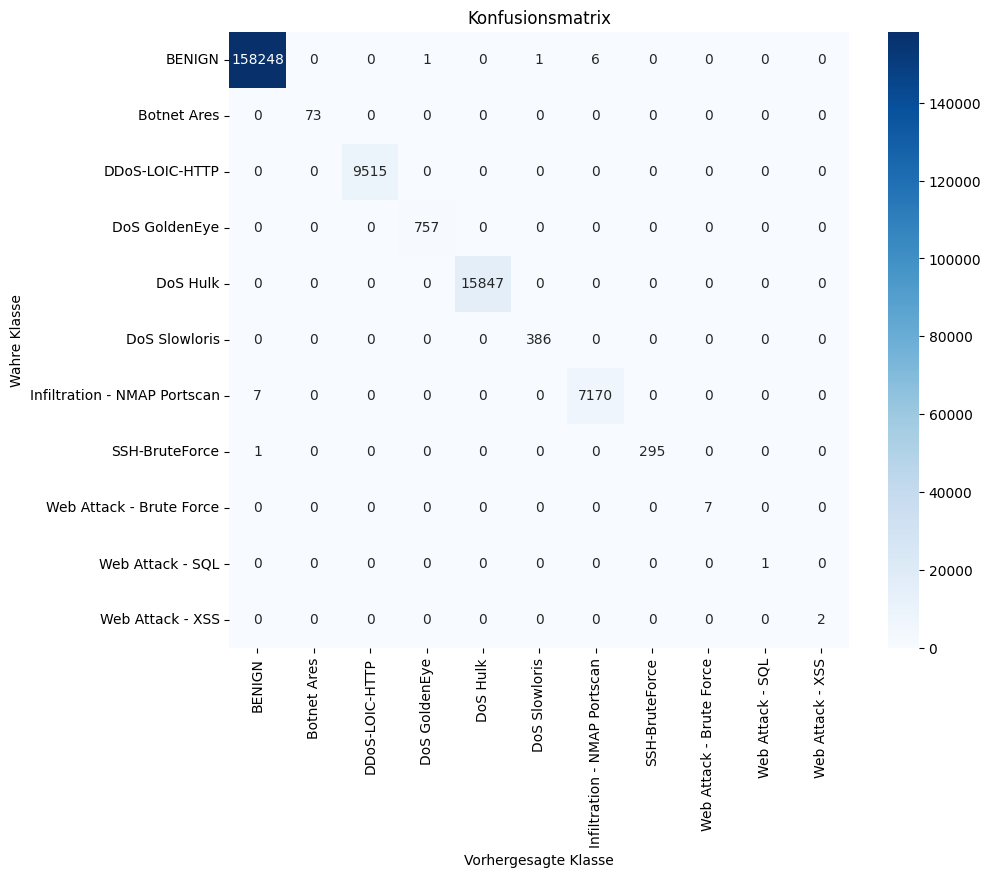

In [39]:
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.xlabel('Vorhergesagte Klasse')
plt.ylabel('Wahre Klasse')
plt.title('Konfusionsmatrix')
plt.show()


### Speichern des Modells und der Vorverarbeitungsschritte

In [ ]:
# Speichern des Modells
cnn_model.save('cnn_model.h5')

# Speichern des Label Encoders und Scalers
import joblib

joblib.dump(label_encoder, 'label_encoder.pkl')
joblib.dump(scaler, 'scaler.pkl')

### Laden des Modells und der Vorverarbeitungswerkzeuge

In [ ]:
from tensorflow import keras
import joblib

# Laden des Modells
cnn_model = keras.models.load_model('cnn_model.h5')

# Laden des Label Encoders und Scalers
label_encoder = joblib.load('label_encoder.pkl')
scaler = joblib.load('scaler.pkl')

### Verarbeitung neuer Daten für Vorhersagen

In [41]:
# Angenommen, new_data ist ein DataFrame mit den gleichen Features wie X
new_data = pd.read_parquet('../01_Datensaetze/improved_cse-cic-ids-2018/ids18_parquet_prep_0')

: 

In [40]:
# Vorverarbeitungsschritte anwenden

# Skalierung der Daten
new_data_scaled = scaler.transform(new_data)

# Umformen der Daten
new_data_reshaped = new_data_scaled.reshape(-1, num_features, 1)

# Vorhersagen treffen
new_pred_prob = cnn_model.predict(new_data_reshaped)
new_pred_classes = np.argmax(new_pred_prob, axis=1)

# Dekodieren der Labels
new_pred_labels = label_encoder.inverse_transform(new_pred_classes)

# Ergebnisse anzeigen
print("Vorhergesagte Klassen:", new_pred_labels)


TypeError: read_table() got an unexpected keyword argument 'nrows'

### Wichtige Überlegungen
- Hyperparameter-Tuning: Experimentieren Sie mit der Anzahl der Epochen, der Batch-Größe, der Lernrate und anderen Hyperparametern, um die Modellleistung zu verbessern.
- Klassengewichtung: Wenn Ihr Datensatz unausgewogen ist, können Sie Klassengewichte verwenden, um das Modell zu sensibilisieren.
- Cross-Validation: Für eine robustere Bewertung könnten Sie Kreuzvalidierungstechniken anwenden.
- Feature-Engineering: Überlegen Sie, ob zusätzliche Feature-Auswahl oder -Extraktion die Leistung verbessern könnte.

In [ ]:
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weights = dict(enumerate(class_weights))

# Beim Training des Modells
cnn_model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=32,
    validation_data=(X_val, y_val),
    class_weight=class_weights
)


## Alt

In [30]:
# from sklearn.decomposition import PCA

# pca = PCA(n_components=81)
# X_reduced = pca.fit_transform(X)

# def preprocessing(df: pd.DataFrame):
#     # Shuffle the dataset
#     df = df.sample(frac=1)

#     # Split features and labels
#     x = df.iloc[:, df.columns != 'Label']
#     y = df[['Label']].to_numpy()

#     # Scale the features between 0 ~ 1 # SIND SCHON SKALLIERT
#     # scaler = MinMaxScaler()  
#     # x = scaler.fit_transform(x)

#     return x, y

# X, Y = preprocessing(df)
#del df

# def create_cnn_model() -> keras.Model:
#     # Creating layers
#     inputs = keras.layers.Input(shape=(9, 9, 1))
#     x = keras.layers.Conv2D(120, 2, activation='relu', padding="same")(inputs)
#     x = keras.layers.Conv2D(60, 3, activation='relu', padding="same")(x)
#     x = keras.layers.Conv2D(30, 4, activation='relu', padding="same")(x)
#     x = keras.layers.Flatten()(x)
#     outputs = keras.layers.Dense(15, activation='softmax')(x)
#     cnn_model = keras.Model(inputs=inputs, outputs=outputs, name='cnn')

#     # Compile layers
#     cnn_model.compile(loss='sparse_categorical_crossentropy',
#                       metrics=['sparse_categorical_accuracy'],
#                       optimizer='adam')

#     return cnn_model

# def reshape_dataset_cnn(x: np.ndarray) -> np.ndarray:
#     # Add padding columns
#     result = np.zeros((x.shape[0], 81)) # Ziel: 81 Spalten (9x9)
#     result[:, :-4] = x # Die ersten 77 Spalten von x einfügen, 4 Spalten Padding bleiben frei

#     # Reshaping dataset
#     result = np.reshape(result, (result.shape[0], 9, 9))
#     result = result[..., tf.newaxis] # Hinzufügen einer Dimension für den CNN Input
#     return result

In [ ]:
# Training
logging.info("*** TRAINING START ***")
history = model.fit(X, Y, validation_split=0.1, epochs=5, batch_size=1024, verbose=True)

In [ ]:
def evaluation(model: keras.Model, x_test: np.ndarray, y_test: np.ndarray):
    score = model.evaluate(x_test, y_test, verbose=False)
    logging.info('Evaluation:\nLoss: {}\nAccuracy : {}\n'.format(score[0], score[1]))

    # F1 score
    y_pred = model.predict(x_test, batch_size=1024, verbose=False)
    y_pred = np.argmax(y_pred, axis=1)

    logging.info("\n{}".format(classification_report(y_test, y_pred)))

In [79]:
def plot_history(history: tf.keras.callbacks.History):
    # summarize history for accuracy
    plt.plot(history.history['sparse_categorical_accuracy'])
    plt.plot(history.history['val_sparse_categorical_accuracy'])
    plt.title('model2 accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model2 loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

In [ ]:
plot_history(history)

In [ ]:
def create_cnn_model() -> keras.Model:
    # Eingabeschicht
    inputs = keras.layers.Input(shape=(86, 1))

    # Faltungsschichten
    x = keras.layers.Conv1D(120, kernel_size=2, activation='relu', padding="same")(inputs)
    x = keras.layers.Conv1D(60, kernel_size=3, activation='relu', padding="same")(x)
    x = keras.layers.Conv1D(30, kernel_size=4, activation='relu', padding="same")(x)

    # Flatten und Ausgabeschicht
    x = keras.layers.Flatten()(x)
    outputs = keras.layers.Dense(15, activation='softmax')(x)

    # Modell erstellen
    cnn_model = keras.Model(inputs=inputs, outputs=outputs, name='cnn')

    # Kompilieren des Modells
    cnn_model.compile(loss='sparse_categorical_crossentropy',
                      metrics=['sparse_categorical_accuracy'],
                      optimizer='adam')

    return cnn_model

In [ ]:
# Create model
model = create_cnn_model()
logging.info(model.summary())

I0000 00:00:1730205427.858323  728088 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1730205427.955095  728088 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1730205427.955134  728088 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1730205427.957727  728088 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1730205427.957768  728088 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:0

Model: "cnn"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 86, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ (None, 86, 120)        │           360 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 86, 60)         │        21,660 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 86, 30)         │         7,230 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2580)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 15)             │        38,715 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 67,965 (265.49 KB)

 Trainable params: 67,965 (265.49 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Checkpoint
cp_path = os.path.join('', "31_cnn_weights-improvement-{epoch:02d}-{val_sparse_categorical_accuracy:.2f}.keras")
checkpoint = keras.callbacks.ModelCheckpoint(cp_path, monitor='val_sparse_categorical_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]